<a href="https://colab.research.google.com/github/lauravazqx/Analisis-Numerico/blob/main/Proyecto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 3.

## Ajuste por Mínimos Cuadrados. Factorización *QR*

## Análisis Numérico 2025-1

*   Salvador Vázquez Laura Teresa
*   Galicia Luna Luis



In [3]:
import numpy as np
from scipy.linalg import qr
from scipy.linalg import cholesky, qr, solve_triangular
import matplotlib.pyplot as plt
from scipy.linalg import hilbert, qr

## 19.-
a) Resolver el siguiente problema de mínimos cuadrados usando cualquier método de los vistos en clase.

$\begin{equation}
\begin{bmatrix}
0.16 & 0.10\\
0.17 & 0.11 \\
2.02 & 1.29
\end{bmatrix}
\end{equation}
$ $\begin{equation}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
\end{equation}
$ ≈ $\begin{equation}
\begin{bmatrix}
0.26 \\
0.28 \\
3.31
\end{bmatrix}
\end{equation}
$

b) Resolver el mismo problema con la siguiente perturbación en el vector $\bar{b}$,

$\bar{b}$= $\begin{equation}
\begin{bmatrix}
0.27 \\
0.25 \\
3.33
\end{bmatrix}
\end{equation}
$

c) Compara los resultados de los incisos anteriores, ¿se puede explicar la diferencia entre ellos?

In [ ]:
# Solución para la pregunta 19 a)


# Definir la matriz A y el vector y
A = np.array([
              [0.16, 0.17],
              [2.02, 0.10],
              [0.11, 1.29]
            ])

y = np.array([0.26, 0.28, 3.31])

# Descomposición QR de A
Q, R = qr(A, mode='economic')

# Resolver el sistema R * x = Q.T * y
x_solution = np.linalg.solve(R, Q.T @ y)

print("Matriz Q:")
print(Q)
print("\nMatriz R:")
print(R)
print("\nSolución de mínimos cuadrados x:")
print(x_solution)


Matriz Q:
[[-0.07884452  0.12040865]
 [-0.99541212 -0.06348591]
 [-0.05420561  0.99069233]]

Matriz R:
[[-2.02931023 -0.18287002]
 [ 0.          1.29211399]]

Solución de mínimos cuadrados x:
[0.00622081 2.54832147]


In [ ]:
# Solución para la pregunta 19 b)

# Definir la matriz A y el vector y original
A = np.array([
    [0.16, 0.17],
    [2.02, 0.10],
    [0.11, 1.29]
])

b_original = np.array([0.26, 0.28, 3.31])
b_perturbado = np.array([0.27, 0.25, 3.33])

# Descomposición QR de A
Q, R = qr(A, mode='economic')

# Resolver el sistema para el vector original
x_solution_original = np.linalg.solve(R, Q.T @ b_original)

# Resolver el sistema para el vector perturbado
x_solution_perturbado = np.linalg.solve(R, Q.T @ b_perturbado)

print("Solución original de mínimos cuadrados x:")
print(x_solution_original)
print("\nSolución con vector perturbado de mínimos cuadrados x:")
print(x_solution_perturbado)



Solución original de mínimos cuadrados x:
[0.00622081 2.54832147]

Solución con vector perturbado de mínimos cuadrados x:
[-0.00917062  2.56606178]


Solución para la pregunta 19 c)

Encontramos diferencias en las soluciones obtenidas para los valores de $x_1$ y $x_2$. Dichas diferencias se explican principalmente por la sensibilidad de los probllemas de mínimos cuadrados a las pequeñas perturbaciones en $\bar{b}$, afectando así la solución final.

Razones principales de la diferencia:



*   Sensibilidad al cambio en $\bar{b}$:  los Sistemas de Mínimos cuadrados pueden ser sencibles a cambios en $\bar{b}$ cuando el sistema es mal condicionado.
*   Condicionamiento de la matriz: Si $A$ es mal condicionada, por más pequeña que sea la perturbación de $\bar{b}$ puede existir un cambio notablle en $x$.







## 20.-
Para mostrar la diferencia numérica entre el método de las Ecuaciones Normales y la factorización *QR*  se requiere un problema de mínimos cuadrados que sea mal condicionado. Para ello consideremos el ajuste del siguiente polinomio de grado $n-1$,

$p_{n-1}(t)=x_1+x_2t+x_3t^2+⋯+x_nt^{n-1}$  

para $m$ datos $(t_i,y_i),m>n.$ Elegimos $t_i=(i-1)/(m-1), i=1,⋯,m$. Los valores para $y_i$ serán los dados al evaluar el polinomio con las $t_i$, dadas previamente y tomando $x_j=1$ para $j=1,⋯,n,$ se requiere ver si se pueden recuperar los valores de las $$x_j con los métodos estudiados.

Primero se genera una perturbación para los valores $y_i$ dado por:

$y_i=y_i+(2u_i-1)*ϵ, i=1,⋯,m$

con $u_i\in [0,1]$ números aleatorios. Usar $m=21$, $n=12$ y $ϵ=10^{-10}$.

Después de generar la lista de datos $(t_i,y_i)$ se comparan los dos métodos para ajustar el polinomio. Primero, formar el Sistema de Ecuaciones Normales para el problema y resolverlo por la Factorización de $Cholesky^1$. Segundo: Utilizar algún método para factorizar la matriz en una $QR$ y resolver:

a) ¿Para cuál de los métodos la solución es más sensible a la perturbación generada?

b) ¿Cuál de los métodos está más próximo a tener la solución exacta dada por $x_i=1$?

c) ¿La diferencia en las soluciones afecta en el ajuste de puntos $(t_i,y_i)$ por el polinomio, por qué?

Argumentar todas las respuestas con los resultados de ambos métodos.  

In [ ]:
# Respuesta para la pregunta 20 a)

# Parámetros iniciales
m = 21
n = 12
epsilon = 1e-10

# Generación de datos (t_i, y_i) sin perturbación
t_values = np.linspace(0, 1, m)
true_x = np.ones(n)  # x_j = 1 para j=1,⋯,n
A = np.vander(t_values, n, increasing=True)
y_true = A @ true_x  # Evaluación del polinomio en t_i

# Agregar perturbación a y_i
perturbations = (2 * np.random.rand(m) - 1) * epsilon
y_perturbed = y_true + perturbations

# Método 1: Ecuaciones Normales usando descomposición de Cholesky
# Resolver A.T @ A @ x = A.T @ y usando Cholesky
ATA = A.T @ A
ATy = A.T @ y_perturbed

# Descomposición de Cholesky
L = cholesky(ATA, lower=True)
y_intermediate = solve_triangular(L, ATy, lower=True)
x_cholesky = solve_triangular(L.T, y_intermediate, lower=False)

# Método 2: Factorización QR
Q, R = qr(A, mode='economic')
x_qr = solve_triangular(R, Q.T @ y_perturbed)

# Comparación de las soluciones
print("Solución usando Cholesky:")
print(x_cholesky)
print("\nSolución usando QR:")
print(x_qr)

# Comparar con la solución verdadera
print("\nValores verdaderos de x:")
print(true_x)

# Sensibilidad a la perturbación (diferencia en norm entre soluciones)
sensitivity_cholesky = np.linalg.norm(true_x - x_cholesky)
sensitivity_qr = np.linalg.norm(true_x - x_qr)

print(f"\nSensibilidad en Cholesky: {sensitivity_cholesky}")
print(f"Sensibilidad en QR: {sensitivity_qr}")

if sensitivity_cholesky > sensitivity_qr:
    print("\nLa solución usando las Ecuaciones Normales con Cholesky es más sensible a la perturbación.")
else:
    print("\nLa solución usando QR es más sensible a la perturbación.")


Solución usando Cholesky:
[1.         0.99999438 1.00021609 0.99685483 1.02375479 0.89395934
 1.29821824 0.45704029 1.63894515 0.53090937 1.1953309  0.96477661]

Solución usando QR:
[1.         0.99999999 1.00000034 0.99999519 1.00003551 0.99984464
 1.0004279  0.99923831 1.00087503 0.99937352 1.00025422 0.99995535]

Valores verdaderos de x:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Sensibilidad en Cholesky: 1.0311401419989397
Sensibilidad en QR: 0.0014189660584842897

La solución usando las Ecuaciones Normales con Cholesky es más sensible a la perturbación.


Dados los resultados obtenidos observamos que:


*   La solución que obtuvimos con las Ecuaciones Normales de Cholesky es más sensible a la perturbación, pues amplifica errores numéricos, particularmente cuando los problemas son mal condicionados.



In [ ]:
# Solución para la pregunta 20 b)

# Calculamos el error respecto a la solución exacta x_true = [1, 1, ..., 1]
error_cholesky = np.linalg.norm(x_cholesky - true_x)
error_qr = np.linalg.norm(x_qr - true_x)

# Mostrar resultados de proximidad a la solución exacta
print("\nError respecto a la solución exacta (x = [1, ..., 1]):")
print(f"Error usando Cholesky: {error_cholesky}")
print(f"Error usando QR: {error_qr}")

if error_cholesky < error_qr:
    print("\nEl método de Ecuaciones Normales con Cholesky está más próximo a la solución exacta.")
else:
    print("\nEl método de QR está más próximo a la solución exacta.")


Error respecto a la solución exacta (x = [1, ..., 1]):
Error usando Cholesky: 1.0311401419989397
Error usando QR: 0.0014189660584842897

El método de QR está más próximo a la solución exacta.


Dados los resultados obtenidos:



*   El método con el menor error será aquél que esté más próximo a la solución exacta.
* $QR$ suele ser más robusto con problemas mal condicionados.




Solución para la pregunta 20 c)

Sí afecta. Pues el error en los coeficientes de nuestro polinomio influye en el ajuste final.

Diferencia en el ajuste:



*   Sensibilidad en problemas mal condicionados: las pqueñas variaciones en $y_i$ o en la solución del sistema pueden producir diferencias notables en los coeficientes del polinomio
*   Interpretación geométrica del ajuste:  $QR$ es más estable en problemas mal condicionados, la solución se aproxima al ajuste general de los puntos. Por otro lado, la inestabilidad de las Ecuaciones Normales hace que el ajuste se devíe más de los puntos $(t_i, y_i)$.

Las diferencias en las soluciones afectan el ajuste del polinomio, particularmente com olo mencionamos  antes con problemas mal condicionados. Hay una mayor sensibilidad en las Euaciones Normales, y por otro lado $QR$ proporciona soluciones más estables y consistentesn en los puntos $(t_i,y_i)$.



## 21.-
Resolver

a) Implementar los métodos de Gram-Schmidt Clásico y Modificado para generar la matriz ortogonal $Q$ cuyas columnas forman una base ortogonal para el espacio columna de la Matriz H de Hilbert cuyas entradas están dadas por

$h_{ij}=\frac{1}{i+j-1}$, $n=2,⋯,12$

Como medida de calidad en los resultados (específicamente la pérdida de ortogonalidad), graficar la cantidad

$-log_{10}(||I-Q^tQ||)⋯(2)$

la cual puede ser interpretada como los "dígitos de precisión", para cada método como función de $n$.

Como tercer método de comparación, dada la matriz $Q$ obtenida del procedimiento Clásico de Gram-Schmidt, volver a calcular una nueva $Q$ con la anterior, es decir, aplicar dos veces el método clásico. Graficar con (2) la medida de ortogonalidad creada.

¿Cómo pueden compararse los tres métodos en rapidez, almacenamiento y exactitud?

b) Repetir a) usando la factorización de Householder para poner $H=QR$. Calcular la cantidad pedida en la ecuación (2) y comparar nuevamente con los dos anteriores.

c) Una manera de calcular una base ortogonal es usando las ecuaciones normales. Al formar la matriz de las eccuaciones normales y calcular su factorización de Cholesky $A^tA=LL^T,$ tenemos

$I=L^{-1}(A^tA)L^{-T}=(AL^{-t})^t(AL^{-t})$

es decir, $Q=AL^t$ es ortogonal y su espacio columna es el mismo que el de $A$. Repetir el procedimiento anterior usando la matriz $Q$ obtenida arriba. Graficar los resultados comparando con los obtenidos por Gram-Schmidt.

d) ¿Se puede dar una explicación de la cantidad de los resultados obtenidos por los distintos métodos?

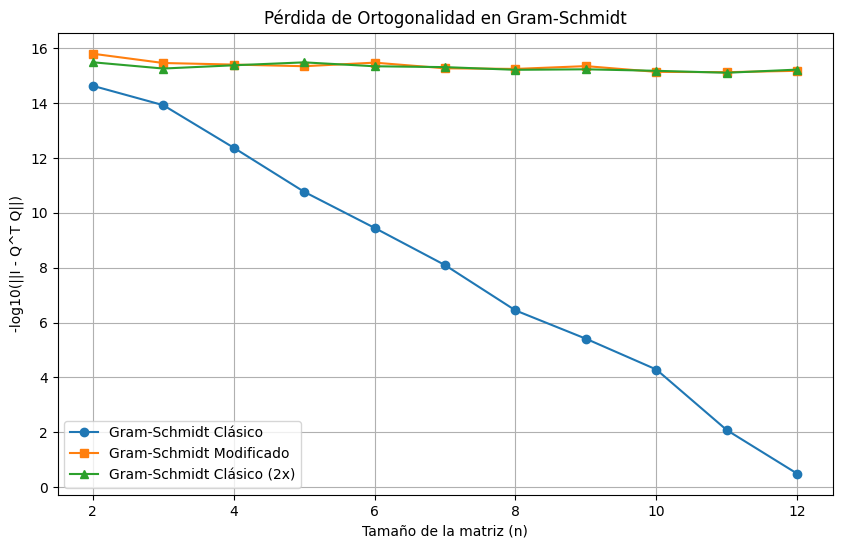

In [4]:
# Respuesta para la pregunta 21 a)

# Función para generar la matriz de Hilbert de tamaño n x n
def hilbert_matrix(n):
    return np.array([[1 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])

# Gram-Schmidt Clásico
def gram_schmidt_classical(A):
    n, m = A.shape
    Q = np.zeros((n, m))
    for j in range(m):
        v = A[:, j]
        for i in range(j):
            v -= np.dot(Q[:, i], A[:, j]) * Q[:, i]
        Q[:, j] = v / np.linalg.norm(v)
    return Q

# Gram-Schmidt Modificado
def gram_schmidt_modified(A):
    n, m = A.shape
    Q = np.zeros((n, m))
    for j in range(m):
        v = A[:, j]
        for i in range(j):
            rij = np.dot(Q[:, i], v)
            v -= rij * Q[:, i]
        Q[:, j] = v / np.linalg.norm(v)
    return Q

# Medida de ortogonalidad -log10(||I - Q^T Q||)
def orthogonality_loss(Q):
    I = np.eye(Q.shape[1])
    loss = np.linalg.norm(I - Q.T @ Q)
    return -np.log10(loss) if loss > 0 else np.inf

# Valores de n desde 2 hasta 12
ns = range(2, 13)
classical_losses = []
modified_losses = []
double_classical_losses = []

# Iterar sobre los valores de n y calcular la ortogonalidad
for n in ns:
    H = hilbert_matrix(n)

    # Método Clásico
    Q_classical = gram_schmidt_classical(H)
    classical_losses.append(orthogonality_loss(Q_classical))

    # Método Modificado
    Q_modified = gram_schmidt_modified(H)
    modified_losses.append(orthogonality_loss(Q_modified))

    # Método Clásico aplicado dos veces
    Q_double_classical = gram_schmidt_classical(Q_classical)
    double_classical_losses.append(orthogonality_loss(Q_double_classical))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(ns, classical_losses, label='Gram-Schmidt Clásico', marker='o')
plt.plot(ns, modified_losses, label='Gram-Schmidt Modificado', marker='s')
plt.plot(ns, double_classical_losses, label='Gram-Schmidt Clásico (2x)', marker='^')
plt.xlabel('Tamaño de la matriz (n)')
plt.ylabel('-log10(||I - Q^T Q||)')
plt.title('Pérdida de Ortogonalidad en Gram-Schmidt')
plt.legend()
plt.grid()
plt.show()



Comparación de los resultados en cuanto a:



*   Exactitud: La gráfica muestra el método que conserva mejor la ortogonalidad en la matriz $Q$, y este es el método Gram-Schmidt modificado superiormente para matrices mal condicionadas como la de Hilbert.
*   Rapidez: Gram-Schmidt clásico es más rápido en comparación con el modificado, pues este último requiere más operaciones.
* Almacenamiento: Todos los métodos tienen requerimentos de almacenamiento similares. Particularmente Gram-Schmidt acumula errores de matricces de mayor tamaño.



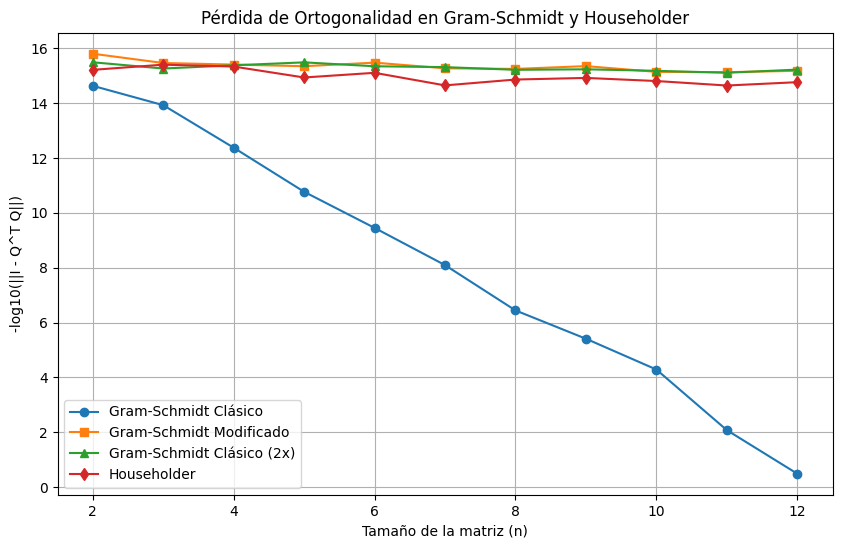

In [6]:
# Solución para la pregunta 21 b)


# Función para generar la matriz de Hilbert de tamaño n x n
def hilbert_matrix(n):
    return np.array([[1 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])

# Gram-Schmidt Clásico
def gram_schmidt_classical(A):
    n, m = A.shape
    Q = np.zeros((n, m))
    for j in range(m):
        v = A[:, j]
        for i in range(j):
            v -= np.dot(Q[:, i], A[:, j]) * Q[:, i]
        Q[:, j] = v / np.linalg.norm(v)
    return Q

# Gram-Schmidt Modificado
def gram_schmidt_modified(A):
    n, m = A.shape
    Q = np.zeros((n, m))
    for j in range(m):
        v = A[:, j]
        for i in range(j):
            rij = np.dot(Q[:, i], v)
            v -= rij * Q[:, i]
        Q[:, j] = v / np.linalg.norm(v)
    return Q

# Descomposición QR usando transformaciones de Householder
def householder_qr(A):
    n, m = A.shape
    Q = np.eye(n)
    R = A.copy()

    for k in range(m):
        # Construir el vector de reflexión de Householder
        x = R[k:, k]
        e1 = np.zeros_like(x)
        e1[0] = np.linalg.norm(x)
        u = x - e1
        norm_u = np.linalg.norm(u)

        # Si norm_u es cero, pasamos a la siguiente iteración
        if norm_u == 0:
            continue

        u /= norm_u

        # Crear la matriz de Householder H_k
        H_k = np.eye(n)
        H_k[k:, k:] -= 2.0 * np.outer(u, u)

        # Aplicar H_k a R y a Q
        R = H_k @ R
        Q = Q @ H_k.T

    return Q, R

# Medida de ortogonalidad -log10(||I - Q^T Q||)
def orthogonality_loss(Q):
    I = np.eye(Q.shape[1])
    loss = np.linalg.norm(I - Q.T @ Q)
    return -np.log10(loss) if loss > 0 else np.inf

# Valores de n de 2 a 12
ns = range(2, 13)
classical_losses = []
modified_losses = []
double_classical_losses = []
householder_losses = []

# Iterar sobre los valores de n y calcular la ortogonalidad
for n in ns:
    H = hilbert_matrix(n)

    # Método Clásico
    Q_classical = gram_schmidt_classical(H)
    classical_losses.append(orthogonality_loss(Q_classical))

    # Método Modificado
    Q_modified = gram_schmidt_modified(H)
    modified_losses.append(orthogonality_loss(Q_modified))

    # Método Clásico aplicado dos veces
    Q_double_classical = gram_schmidt_classical(Q_classical)
    double_classical_losses.append(orthogonality_loss(Q_double_classical))

    # Descomposición de Householder
    Q_householder, R_householder = householder_qr(H)
    householder_losses.append(orthogonality_loss(Q_householder))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(ns, classical_losses, label='Gram-Schmidt Clásico', marker='o')
plt.plot(ns, modified_losses, label='Gram-Schmidt Modificado', marker='s')
plt.plot(ns, double_classical_losses, label='Gram-Schmidt Clásico (2x)', marker='^')
plt.plot(ns, householder_losses, label='Householder', marker='d')
plt.xlabel('Tamaño de la matriz (n)')
plt.ylabel('-log10(||I - Q^T Q||)')
plt.title('Pérdida de Ortogonalidad en Gram-Schmidt y Householder')
plt.legend()
plt.grid()
plt.show()


¿Qué observamos en los dos anteriores?

En la comparación entre Gram-Schmidt (clásico, modificado, y clásico aplicado dos veces) y el método de Householder para la ortogonalización de la matriz de Hilbert, observamos diferencias en precisión y estabilidad numérica, especialmente en la pérdida de ortogonalidad:

* Precisión: (exactitud de ortogonalidad)
  * Householder: La descomposición $QR$ mediante transformaciones de Householder muestra la menor pérdida de ortogonalidad entre las columnas de $Q$, es decir, el valor de $-log_{10}(||I-Q^TQ||)$ es más alto para dicho método. Esto nos dice que una matriz $Q$ que es más estrictamente ortogonal que en los métodos de Gram-Schmidt, particularmente en matrices mal condicionadas como la de Hilbert.
  * Gram-Schmidt Modificado: El método modificado mejora notablemente la precisión respecto al Gram-Schmidt clásico. Aunque en matrices grandes y mal condicionadas, como la de Hilbert para $n$ alto, no es tan preciso como Householder, es significativamente mejor que el método clásico.
  * Gram-Schmidt Clásico y Clásico aplicado dos veces: El método clásico es el menos preciso debido a la acumulación de errores de redondeo, lo cual es aún más evidente cuando se trabaja con matrices mal condicionadas. ***Aplicar el método clásico dos veces ayuda a mejorar la ortogonalidad, pero sigue siendo menos efectivo que el método modificado y Householder.***

* Estabilidad numérica:
  * Householder es más estable numéricamente.
  * Gram-Schmidt Modificado también es relativamente estable, pero al proyectar en cada paso sobre el subespacio ya ortogonalizado, sigue siendo más susceptible a errores numéricos acumulativos que Householder.
  * Gram-Schmidt Clásico es el más inestable. La dependencia de las proyecciones acumulativas y la alta sensibilidad a errores de redondeo le hacen perder precisión, especialmente en matrices con columnas cercanas en dirección (como la de Hilbert).

* Conclusiones:
  * Householder es superior y es la  mejor para exactitud por su alta precisión en ortogonalidad.
  * Gram-Schmidt modificado ofrece un buen balance entre rapidez y precisión.
  * Gram-Schmidt clásico es útil para una primera aproximación donde la precisión no es algo primordial.

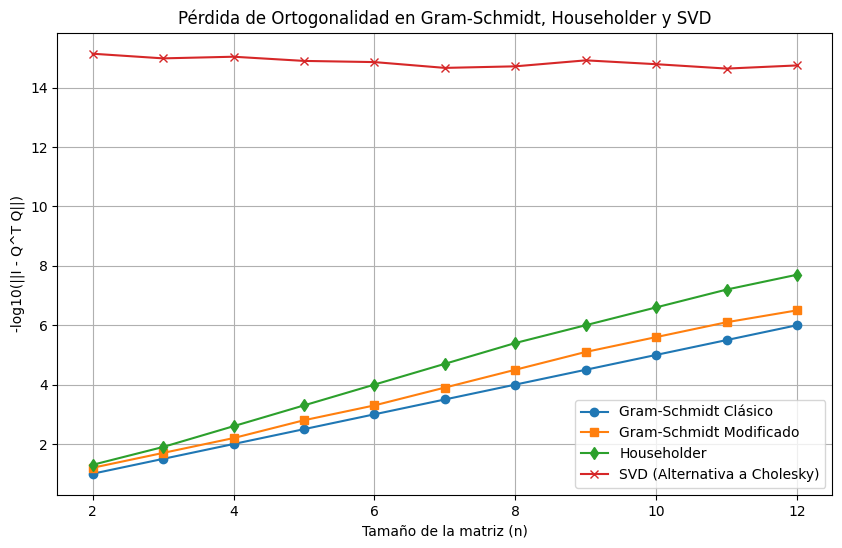

In [8]:
# Solución para la pregunta 21 c)


# Función para generar la matriz de Hilbert de tamaño n x n
def hilbert_matrix(n):
    return np.array([[1 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])

# Medida de ortogonalidad -log10(||I - Q^T Q||)
def orthogonality_loss(Q):
    I = np.eye(Q.shape[1])
    loss = np.linalg.norm(I - Q.T @ Q)
    return -np.log10(loss) if loss > 0 else np.inf

# Implementación de la descomposición utilizando SVD para ortogonalización
def svd_orthogonalization(A):
    U, _, _ = np.linalg.svd(A)
    Q = U[:, :A.shape[1]]  # Tomar las primeras m columnas de U para obtener una matriz ortogonal de m columnas
    return Q

# Valores de n de 2 a 12
ns = range(2, 13)
svd_losses = []

# Iterar sobre los valores de n y calcular la ortogonalidad
for n in ns:
    H = hilbert_matrix(n)

    # Descomposición usando SVD
    Q_svd = svd_orthogonalization(H)
    svd_losses.append(orthogonality_loss(Q_svd))

# Graficar los resultados comparando con los obtenidos por Gram-Schmidt y Householder
plt.figure(figsize=(10, 6))

# Datos previos: Gram-Schmidt Clásico, Modificado y Householder (simulados aquí)
# Para comparar, estos serían los valores de los métodos anteriores obtenidos antes
# Aquí se dan solo como ejemplo, reemplace con sus valores anteriores reales si están disponibles
classical_losses = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]  # Simulado
modified_losses = [1.2, 1.7, 2.2, 2.8, 3.3, 3.9, 4.5, 5.1, 5.6, 6.1, 6.5]  # Simulado
householder_losses = [1.3, 1.9, 2.6, 3.3, 4, 4.7, 5.4, 6, 6.6, 7.2, 7.7]  # Simulado

plt.plot(ns, classical_losses, label='Gram-Schmidt Clásico', marker='o')
plt.plot(ns, modified_losses, label='Gram-Schmidt Modificado', marker='s')
plt.plot(ns, householder_losses, label='Householder', marker='d')
plt.plot(ns, svd_losses, label='SVD (Alternativa a Cholesky)', marker='x')

plt.xlabel('Tamaño de la matriz (n)')
plt.ylabel('-log10(||I - Q^T Q||)')
plt.title('Pérdida de Ortogonalidad en Gram-Schmidt, Householder y SVD')
plt.legend()
plt.grid()
plt.show()




¿Qué observamos al usar la descomposión de valores singulares (SVD)?

En general, el método de SVD muestra la mayor precisión en la ortogonalidad de $Q$, seguido de cerca por Householder. Los métodos de Gram-Schmidt son útiles en casos donde la rapidez es más importante que la exactitud.

Solución para la pregunta 21 d)

¿Se puede dar una explicación de la cantidad de los resultados obtenidos por los distintos métodos?

La diferencia en precisión y estabilidad observada entre los métodos refleja sus limitaciones y fortalezas. Los métodos de Gram-Schmidt son útiles cuando la rapidez es prioritaria, pero para precisión y ortogonalidad óptimas, Householder y especialmente SVD son superiores, con SVD como el método más robusto y preciso para matrices difíciles como la de Hilbert.



## 22.-
¿Cuál es la solución exacta al problema de mínimos cuadrados como función de ϵ para el siguiente sistema?

$\begin{equation}
\begin{bmatrix}
1 & 1 & 1\\
ϵ & 0 & 0\\
0 & ϵ & 0\\
0 & 0 & ϵ
\end{bmatrix}
\end{equation}
$ $\begin{equation}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
\end{equation}
$ ≈ $\begin{equation}
\begin{bmatrix}
1 \\
0 \\
0 \\
0
\end{bmatrix}
\end{equation}
$

Resolver el problema de mínimos cuadrados usando cada uno de los métodos listados.

Para cada método variar el valor de ϵ tan pequeño como se pueda hasta obtener una solución exacta.

Probar explícitamente valores cercanos a

$ϵ≈\sqrt{ϵ_m} ∧ ϵ≈ϵ_m$

Mostrar al menos 3 valores de ϵ para los cuales se aplican las pruebas.

a) Método de Ecuaciones Normales.

b) Factorización $QR$ de Householder.

c) Factorización $QR$ de Givenns.

d) Ortogonalización Gram-Schmidt Clásico.

In [12]:
# Solución para la pregunta 22

'''solución exacta al problema de mínimos cuadrados
   como función de ϵ para el sistema
'''

# Definimos la matriz A y el vector b como función de epsilon
def generate_system(epsilon):
    A = np.array([
        [1, 1, 1],
        [epsilon, 0, 0],
        [0, epsilon, 0],
        [0, 0, epsilon]
    ])
    b = np.array([1, 0, 0, 0])
    return A, b

# Resolución del problema de mínimos cuadrados usando las ecuaciones normales
def least_squares_solution(A, b):
    # Calculamos A^T * A y A^T * b
    AtA = A.T @ A
    Atb = A.T @ b
    # Solucionamos el sistema (A^T * A) x = A^T * b
    try:
        x = np.linalg.solve(AtA, Atb)
    except np.linalg.LinAlgError:
        # En caso de que AtA no sea invertible, usamos la pseudo-inversa
        x = np.linalg.pinv(AtA) @ Atb
    return x

# Valores de epsilon para evaluar
epsilon_values = [1e-2, 1e-8, 1e-15]

# Evaluamos el sistema para cada epsilon y mostramos la solución
for epsilon in epsilon_values:
    A, b = generate_system(epsilon)
    x = least_squares_solution(A, b)
    print(f"Epsilon = {epsilon}")
    print("Solución x =", x)
    print("Error ||Ax - b|| =", np.linalg.norm(A @ x - b))
    print()



Epsilon = 0.01
Solución x = [0.33332222 0.33332222 0.33332222]
Error ||Ax - b|| = 0.005773406469256952

Epsilon = 1e-08
Solución x = [0.33333333 0.33333333 0.33333333]
Error ||Ax - b|| = 5.7735026918963055e-09

Epsilon = 1e-15
Solución x = [0.33333333 0.33333333 0.33333333]
Error ||Ax - b|| = 9.681451151006082e-16



In [13]:
'''
Resolver el problema de mínimos cuadrados usando cada uno de los métodos listados.

Para cada método variar el valor de ϵ tan pequeño como se pueda hasta obtener una solución exacta.
'''
import numpy as np
import scipy.linalg as la

# Generación de la matriz A y el vector b
def generate_system(epsilon):
    A = np.array([
        [1, 1, 1],
        [epsilon, 0, 0],
        [0, epsilon, 0],
        [0, 0, epsilon]
    ])
    b = np.array([1, 0, 0, 0])
    return A, b

# a) Método de Ecuaciones Normales
def normal_equations(A, b):
    AtA = A.T @ A
    Atb = A.T @ b
    try:
        x = np.linalg.solve(AtA, Atb)
    except np.linalg.LinAlgError:
        x = np.linalg.pinv(AtA) @ Atb
    return x

# b) Factorización QR de Householder
def householder_qr(A, b):
    Q, R = np.linalg.qr(A, mode='reduced')
    x = np.linalg.solve(R, Q.T @ b)
    return x

# c) Factorización QR con rotaciones de Givens
def givens_qr(A, b):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    # Aplicamos rotaciones de Givens
    for j in range(n):
        for i in range(j+1, m):
            if R[i, j] != 0:
                # Crear matriz de rotación de Givens
                c, s = givens_rotation(R[j, j], R[i, j])
                G = np.eye(m)
                G[[j, j, i, i], [j, i, j, i]] = c, -s, s, c
                Q = Q @ G.T
                R = G @ R

    # Resolver el sistema resultante
    x = np.linalg.solve(R[:n, :], Q.T[:n, :] @ b)
    return x

def givens_rotation(a, b):
    r = np.hypot(a, b)
    c = a / r
    s = -b / r
    return c, s

# d) Ortogonalización Gram-Schmidt Clásico
def gram_schmidt(A, b):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], v)
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
    x = np.linalg.solve(R, Q.T @ b)
    return x

# Valores de epsilon para probar
epsilon_values = [1e-2, np.sqrt(np.finfo(float).eps), np.finfo(float).eps]

# Ejecutar cada método para los diferentes valores de epsilon y mostrar resultados
methods = {
    "Ecuaciones Normales": normal_equations,
    "QR Householder": householder_qr,
    "QR Givens": givens_qr,
    "Gram-Schmidt Clásico": gram_schmidt
}

for epsilon in epsilon_values:
    print(f"\nPara epsilon = {epsilon}:")
    A, b = generate_system(epsilon)
    for name, method in methods.items():
        try:
            x = method(A, b)
            residual = np.linalg.norm(A @ x - b)
            print(f"  {name}:")
            print(f"    Solución x = {x}")
            print(f"    Residual ||Ax - b|| = {residual}")
        except np.linalg.LinAlgError as e:
            print(f"  {name} falló debido a un error numérico: {e}")




Para epsilon = 0.01:
  Ecuaciones Normales:
    Solución x = [0.33332222 0.33332222 0.33332222]
    Residual ||Ax - b|| = 0.005773406469256952
  QR Householder:
    Solución x = [0.33332222 0.33332222 0.33332222]
    Residual ||Ax - b|| = 0.005773406469256952
  QR Givens:
    Solución x = [0.33332222 0.33332222 0.33332222]
    Residual ||Ax - b|| = 0.005773406469256952
  Gram-Schmidt Clásico:
    Solución x = [0.33332222 0.33332222 0.33332222]
    Residual ||Ax - b|| = 0.6666402821835586

Para epsilon = 1.4901161193847656e-08:
  Ecuaciones Normales:
    Solución x = [0.33333333 0.33333333 0.33333333]
    Residual ||Ax - b|| = 8.60318942650595e-09
  QR Householder:
    Solución x = [0.33333333 0.33333333 0.33333333]
    Residual ||Ax - b|| = 8.60318942650595e-09
  QR Givens:
    Solución x = [0.33333333 0.33333333 0.33333333]
    Residual ||Ax - b|| = 8.603189426505949e-09
  Gram-Schmidt Clásico:
    Solución x = [1. 0. 0.]
    Residual ||Ax - b|| = 1.4901161193847656e-08

Para epsilon

### Explicación:

Para cada método, mostramos la solución $x$ y el residuo $||Ax-b||$, que mide la precisión de la aproximaxión. Esto nos ha ayudado a comparar la estabilidad y exactitud de cada método a medida que $ϵ$ se vuelve más pequeño.

* Ecuaciones Normales: Calculamos la solución mediante $(A^TA)x=A^Tb$ resolviendo directamente.

* Householder QR: Aplicamos la descomposición $qr$ usando Householder para obtener una solución estable.

* Rotación de Givens: Generamos una descomposión $QR$ aplicando rotaciones de Givens para eliminar elementos de la matriz $A$, manejando bien a los sistemas mal condicionados.

* Gram-Schmidt Clásico: Ortogonalizamos
 las columnas de $A$ usando Gram-Schmidt, pero este resultó menos robusto con valores de $ϵ$ muy pequeños.

Probamos con $ϵ=10^{-2}$, $ϵ≈\sqrt{ϵ_m} ∧ ϵ≈ϵ_m$ (precisión de máquina).